In [1]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import torch 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

#logs = os.listdir(path)

best_loss ={}
dfs = {}
params = {'axes.labelsize': 20,
          'axes.titlesize': 30,
         }
plt.rcParams.update(params)

In [2]:
def get_agg_data(names, curve_type='train', dataset='cifar10'):
    folder_path = './logs/{}'.format(dataset)
    paths = [os.path.join(folder_path, name) for name in names]  
    curves = {name: torch.load(fp) for name, fp in zip(names, paths)}#get_data(names[opt])  
    df_agg = pd.DataFrame({ key : value[curve_type +'_loss'] for key, value in curves.items()})
    return df_agg

def agg_plot(names, curve_type='train', labels = None, ylim=(80,101), loc = 'upper right', figsize=(10,8), dataset='cifar10', xlim=None):
    plt.figure(figsize=figsize)
    plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
   
        df_agg = get_agg_data(names[opt], curve_type, dataset=dataset)
    
        
    
        acc = np.array(df_agg.mean(axis=1))
        std = np.array(df_agg.std(axis=1))    
        x = range(1, len(acc)+1)
        if 'sghmc' in label.lower():
            plt.plot(x, acc, '-', label=label, linewidth=2)
        else: 
            plt.plot(x, acc, '--', label=label, linewidth=2)
        plt.fill_between(x, acc-std, acc+std, alpha=0.15)
  
    plt.legend(fontsize=25, loc=loc)
    plt.grid()
    plt.title('{} MSE'.format(curve_type.upper()))
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.xticks(fontsize =20)
    plt.yticks(fontsize =20)
    plt.tight_layout()
    plt.savefig('concrete.png')
    plt.show()

def get_best_acc(names, curve_type='train', labels = None, dataset='cifar10'):  
    opts = [label.lower() for label in labels]
  
    for opt, label in zip(opts, labels):
        df_agg = get_agg_data(names[opt], curve_type, dataset)
        print(opt, df_agg.min(axis=0).mean(), df_agg.min(axis=0).std())



    


### **CONCRETE**

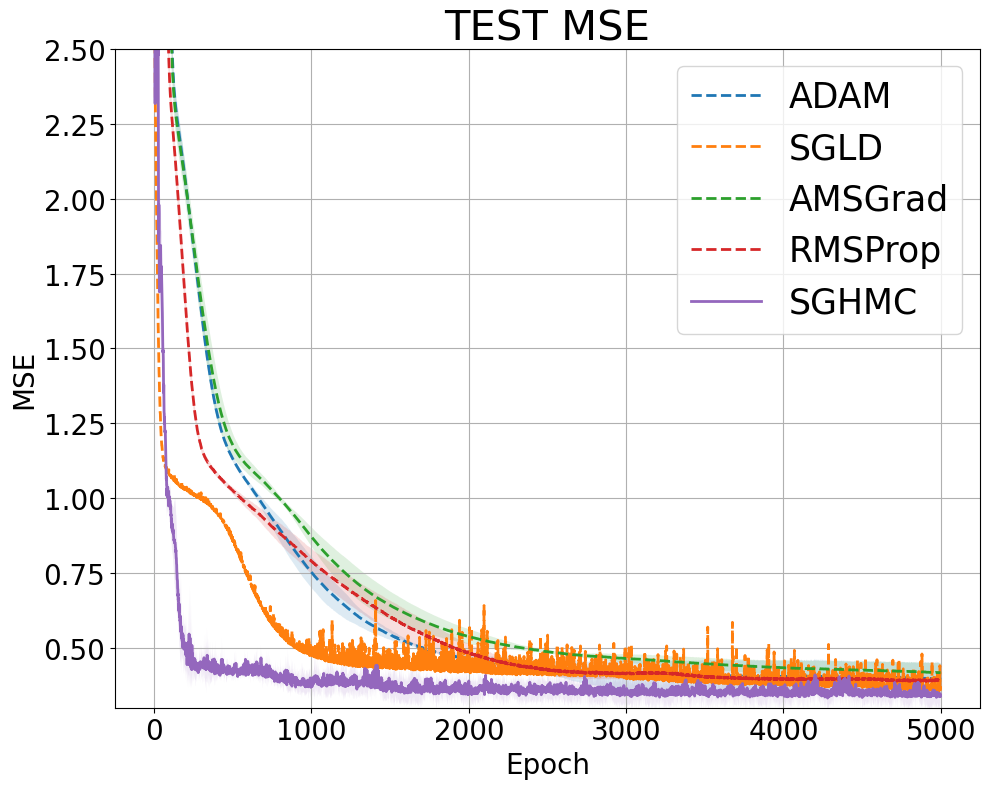

adam 0.39452097253892027 0.053132487590934974
sgld 0.35471703242329716 nan
amsgrad 0.4165565836391017 0.03156774606685511
rmsprop 0.384666344108705 0.0005029354447381935
sghmc 0.3212568844792141 0.033337649768454276


In [4]:
names = {'adam':['concrete-adam-slfn-bs256-seed111-lr0.001-betas0.9-0.999-wdecay0', 
                 'concrete-adam-slfn-bs256-seed222-lr0.001-betas0.9-0.999-wdecay0', 
                 'concrete-adam-slfn-bs256-seed222-lr0.001-betas0.9-0.999-wdecay0', 
          ],                 
         'sgld': ['concrete-SGLD-slfn-bs256-seed111-lr0.002-beta1.0e+10-wdecay0',
                  'concrete-SGLD-slfn-bs256-seed111-lr0.002-beta1.0e+10-wdecay0',
                  'concrete-SGLD-slfn-bs256-seed111-lr0.002-beta1.0e+10-wdecay0'
                  ], 
         'amsgrad':['concrete-amsgrad-slfn-bs256-seed111-lr0.001-betas0.9-0.999-wdecay0',             
                    'concrete-amsgrad-slfn-bs256-seed222-lr0.001-betas0.9-0.999-wdecay0',             
                    'concrete-amsgrad-slfn-bs256-seed333-lr0.001-betas0.9-0.999-wdecay0',             
         ],
         'rmsprop':['concrete-rmsprop-slfn-bs256-seed111-lr0.001-wdecay0',             
                    'concrete-rmsprop-slfn-bs256-seed222-lr0.001-wdecay0',             
                    'concrete-rmsprop-slfn-bs256-seed333-lr0.001-wdecay0',             
         ],                 
         'sghmc': ['concrete-SGHMC-slfn-bs128-seed111-lr0.01-gamma0.5-beta1.0e+10-wdecay0',
                   'concrete-SGHMC-slfn-bs128-seed333-lr0.01-gamma0.5-beta1.0e+10-wdecay0',
                   'concrete-SGHMC-slfn-bs128-seed444-lr0.01-gamma0.5-beta1.0e+10-wdecay0'
                  ]   
        }
labels = ['ADAM',
          'SGLD',
          'AMSGrad',          
          'RMSProp',
          'SGHMC',
         ]
dataset = 'concrete'
agg_plot(names, curve_type='test', dataset=dataset,  labels=labels, ylim = (0.3, 2.5)) 
get_best_acc(names, curve_type='test', dataset=dataset, labels=labels) 
